### Sanity checks:

In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, multiprocessing as mp, gc
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange
from ecology_functions import *
gc.enable()

In [2]:
gc.collect()

0

In [16]:
T = 1000
I = 10   # number of locations
J = 5    # number of species
K = 3    # number of latent factors

In [17]:
lmbda = npr.randn(J,K)
alpha = npr.randn(J)
c = 0
phi = 0.5
logsigmasq = 0
x_0 = npr.randn(I,K)

theta = [alpha, lmbda, c, phi, logsigmasq]
Y, X = simulate_data(x_0, T, J, theta)

In [11]:
n_particles = 1000
alpha_grad, lmbda_grad, c_grad, phi_grad, logsigmasq_grad, logNC = \
get_grads(Y, x_0, n_particles, theta, Tmax=T, Imax=I, Jmax=J, Kmax=K, rep=500)

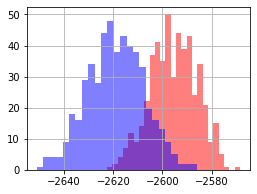

In [12]:
fig = plt.rcParams['figure.figsize'] = (4, 3)
plt.hist(logNC[:,0], bins=25, alpha=0.5, color="red")
plt.hist(logNC[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True);

In [13]:
print("Ratio of variances of gradients")
# print(np.std(alpha_grad,0))
print("For lambda :    ", np.round(np.var(lmbda_grad,0)[1]/np.var(lmbda_grad,0)[0],2))
print("For c :         ", np.round(np.var(c_grad,0)[1]/np.var(c_grad,0)[0],2))
print("For phi :       ", np.round(np.var(phi_grad,0)[1]/np.var(phi_grad,0)[0],2))
print("For logsigmasq :", np.round(np.var(logsigmasq_grad,0)[1]/np.var(logsigmasq_grad,0)[0],2))

Ratio of variances of gradients
For lambda :     [[7.41 7.08 5.98]
 [7.75 7.4  7.24]
 [6.23 5.96 5.89]
 [6.61 6.98 5.83]
 [7.48 5.93 6.81]]
For c :          7.24
For phi :        4.82
For logsigmasq : 5.74


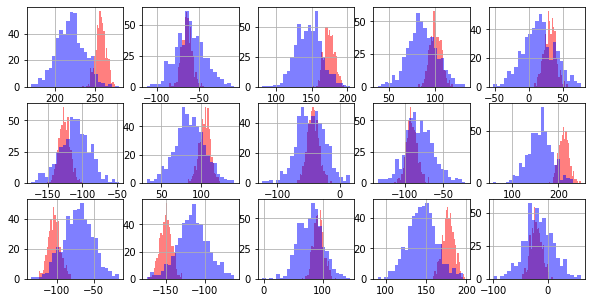

In [14]:
fig = plt.rcParams['figure.figsize'] = (10, 5)
for k in range(K) :
    for j in range(J) :
        idx = k*J + j + 1
        plt.subplot(K,J,idx)
        plt.hist(lmbda_grad[:,0,j,k], bins=25, alpha=0.5, color="red")
        plt.hist(lmbda_grad[:,1,j,k], bins=25, alpha=0.5, color="blue")
        plt.grid(True)

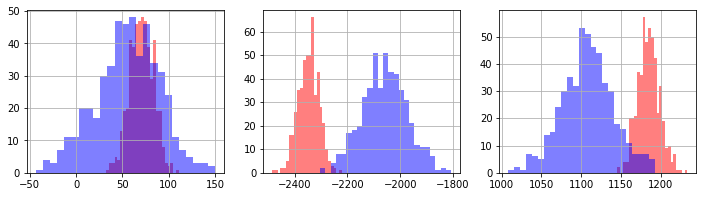

In [15]:
fig = plt.rcParams['figure.figsize'] = (12, 3)
plt.subplot(131)
plt.hist(c_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(c_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)
plt.subplot(132)
plt.hist(phi_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(phi_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)
plt.subplot(133)
plt.hist(logsigmasq_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(logsigmasq_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)

In [18]:
n_particles = 1000
Tmax, Imax, Jmax, Kmax = 1000, 10, 5, 3
alpha_grad, lmbda_grad, c_grad, phi_grad, lagsigmasq_grad, logNC = \
get_grads(Y, x_0, n_particles, theta, Tmax, Imax, Jmax, Kmax, rep=500)
print(np.var(lmbda_grad,0))

[[[ 3426.17224744  4341.90591161  5924.65453373]
  [ 1811.43106821  2108.90760405  3063.13409549]
  [ 5630.14634015  6938.92768552  9644.1914174 ]
  [  849.42054109   922.72365527  1330.23076705]
  [ 1790.96772022  2480.57545627  2710.79186295]]

 [[ 5742.17125467  7555.56541472  9407.73757554]
  [ 2772.56260896  4243.17791099  4694.28644488]
  [ 9250.6280603  11707.2940356  15903.75034512]
  [ 1305.57276591  1699.55553597  2218.93197784]
  [ 3058.32718897  3368.17331065  5264.9557858 ]]]


In [19]:
n_particles = 1000
Tmax, Imax, Jmax, Kmax = 500, 10, 5, 3
alpha_grad, lmbda_grad, c_grad, phi_grad, lagsigmasq_grad, logNC = \
get_grads(Y, x_0, n_particles, theta, Tmax, Imax, Jmax, Kmax, rep=500)
print(np.var(lmbda_grad,0))

[[[1117.89681458 1494.41772541 2084.78428247]
  [ 568.02547551  728.53415039 1090.60089462]
  [2147.55886927 2180.8543191  3298.44738204]
  [ 269.77260878  331.15964942  485.56330673]
  [ 676.1235923   772.08557081 1012.21394419]]

 [[2523.78981726 3506.084786   4830.44185544]
  [1233.85603361 1904.27381639 2356.77883957]
  [4778.42943421 5378.55336877 7605.67522752]
  [ 653.236309    827.41829325  953.13121713]
  [1469.519099   1740.6552296  2092.50856143]]]


In [20]:
n_particles = 1000
Tmax, Imax, Jmax, Kmax = 200, 10, 5, 3
alpha_grad, lmbda_grad, c_grad, phi_grad, lagsigmasq_grad, logNC = \
get_grads(Y, x_0, n_particles, theta, Tmax, Imax, Jmax, Kmax, rep=500)
print(np.var(lmbda_grad,0))

[[[ 237.93729511  302.06393252  455.2856776 ]
  [ 124.03122723  167.63381221  235.58558386]
  [ 396.95888557  461.63250805  693.16810278]
  [  60.29503097   77.81556792  101.8676651 ]
  [ 136.38583617  165.92089619  190.55339267]]

 [[1170.47350932 1371.71898447 1945.6965498 ]
  [ 597.07172992  825.90475112 1012.06444959]
  [2115.95482375 2255.11250854 2987.54132327]
  [ 303.60837344  335.62711054  438.89251565]
  [ 634.3420084   595.26675796  816.44133705]]]


In [21]:
n_particles = 1000
Tmax, Imax, Jmax, Kmax = 50, 10, 5, 3
alpha_grad, lmbda_grad, c_grad, phi_grad, lagsigmasq_grad, logNC = \
get_grads(Y, x_0, n_particles, theta, Tmax, Imax, Jmax, Kmax, rep=500)
print(np.var(lmbda_grad,0))

[[[ 18.99954489  26.79146734  35.57657111]
  [  8.61574261  11.35669286  17.90981171]
  [ 30.12530357  36.34915288  55.47958789]
  [  4.98821429   6.03048213   8.59023062]
  [  8.70851612  10.73410894  14.46754574]]

 [[258.03580338 358.24312411 432.00271958]
  [132.35122146 196.16017701 218.95648722]
  [436.7958719  473.62353809 693.36368074]
  [ 65.7059658   85.83939283  95.86831085]
  [128.31836954 147.61623325 195.82491595]]]


In [25]:
n_particles = 1000
Tmax, Imax, Jmax, Kmax = 200, 5, 3, 2
alpha_grad, lmbda_grad, c_grad, phi_grad, lagsigmasq_grad, logNC = \
get_grads(Y, x_0, n_particles, theta, Tmax, Imax, Jmax, Kmax, rep=500)
print(np.var(lmbda_grad,0))
print(np.var(logNC,0))

[[[  74.18654981  138.38412572]
  [  37.36548329   79.25571747]
  [ 151.35473182  222.57142203]]

 [[ 341.15200787  657.71887202]
  [ 163.56286503  404.97570877]
  [ 662.6427632  1063.01189071]]]
[4.8254328  6.61168567]


In [26]:
n_particles = 1000
Tmax, Imax, Jmax, Kmax = 50, 5, 3, 2
alpha_grad, lmbda_grad, c_grad, phi_grad, lagsigmasq_grad, logNC = \
get_grads(Y, x_0, n_particles, theta, Tmax, Imax, Jmax, Kmax, rep=500)
print(np.var(lmbda_grad,0))
print(np.var(logNC,0))

[[[  5.7211893   11.36215425]
  [  2.97313621   5.21790484]
  [  9.32415192  17.50046583]]

 [[ 59.50527934 114.66283939]
  [ 30.29146366  59.60917722]
  [112.39306785 171.63595772]]]
[1.38884675 1.86123666]


In [27]:
n_particles = 5000
Tmax, Imax, Jmax, Kmax = 50, 5, 3, 2
alpha_grad, lmbda_grad, c_grad, phi_grad, lagsigmasq_grad, logNC = \
get_grads(Y, x_0, n_particles, theta, Tmax, Imax, Jmax, Kmax, rep=500)
print(np.var(lmbda_grad,0))
print(np.var(logNC,0))

[[[ 1.17212265  2.23338275]
  [ 0.55803333  1.09920571]
  [ 2.09818778  3.70866469]]

 [[16.64251131 32.43916247]
  [ 8.76916761 16.19638247]
  [34.03191064 52.27786015]]]
[0.27941343 0.40698402]


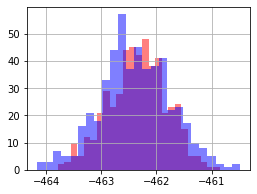

In [28]:
fig = plt.rcParams['figure.figsize'] = (4, 3)
plt.hist(logNC[:,0], bins=25, alpha=0.5, color="red")
plt.hist(logNC[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True);

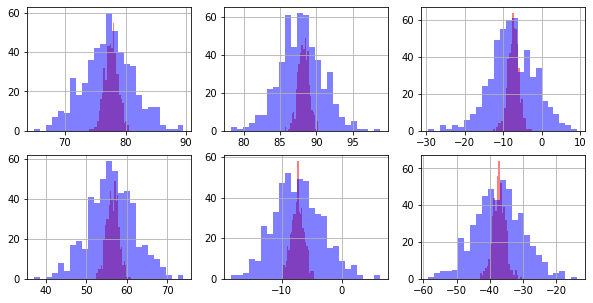

In [31]:
fig = plt.rcParams['figure.figsize'] = (10, 5)
for k in range(Kmax) :
    for j in range(Jmax) :
        idx = k*Jmax + j + 1
        plt.subplot(Kmax,Jmax,idx)
        plt.hist(lmbda_grad[:,0,j,k], bins=25, alpha=0.5, color="red")
        plt.hist(lmbda_grad[:,1,j,k], bins=25, alpha=0.5, color="blue")
        plt.grid(True)

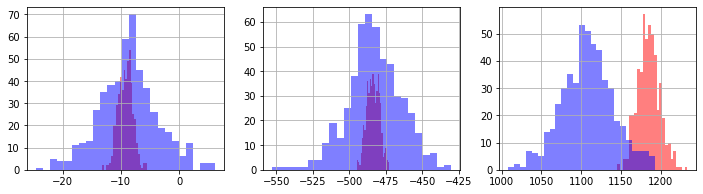

In [32]:
fig = plt.rcParams['figure.figsize'] = (12, 3)
plt.subplot(131)
plt.hist(c_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(c_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)
plt.subplot(132)
plt.hist(phi_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(phi_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)
plt.subplot(133)
plt.hist(logsigmasq_grad[:,0], bins=25, alpha=0.5, color="red")
plt.hist(logsigmasq_grad[:,1], bins=25, alpha=0.5, color="blue")
plt.grid(True)

In [39]:
Y_ = Y[:Tmax,:Imax,:Jmax]
x_0_ = x_0[:Imax,:Kmax]
theta_ = [theta[0][:Jmax], theta[1][:Jmax,:Kmax], theta[2], theta[3], theta[4]]

In [49]:
n_mcmc = 100
n_particles = 5000
tau = 1e-3*np.ones(5)
theta_chain, _ = pMCMC_mala_blockPF(Y_, x_0_, n_particles, theta_, n_mcmc, tau, power=1)

/home/postdoc/dsen/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)
100%|██████████| 100/100 [01:24<00:00,  1.14s/it]

0.0 % acceptance rate


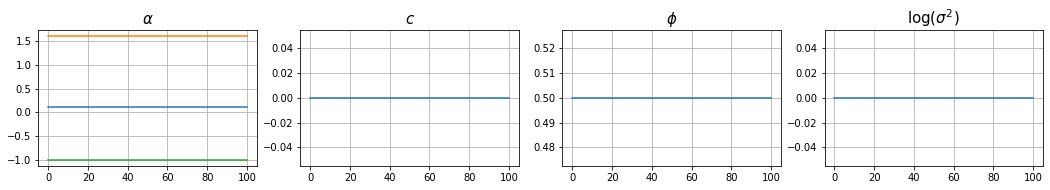

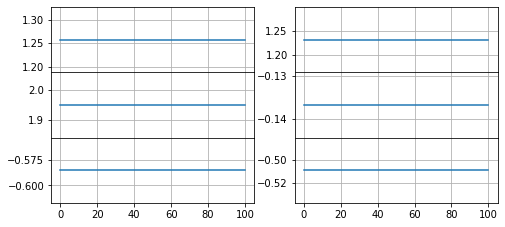

In [50]:
plot_theta_trajectory(theta_chain)